# bioconda mumba

pixy is a command line tool for calculating the population genetic summary statistics pi (average per site heterozygosity) and dxy (average number of nucleotide differences between populations per site) from a VCF file.

- Doc: https://bioconda.github.io/
- Tutorial: https://bioconda.github.io/tutorials/index.html
- Github: https://github.com/bioconda
- Ref: https://github.com/bioconda/bioconda-recipes

## 環境構築

Env: colab

In [37]:
! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-01-30 20:52:53--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89026327 (85M) [application/x-sh]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>]  84.90M   105MB/s    in 0.8s    

2023-01-30 20:52:54 (105 MB/s) - ‘miniconda.sh’ saved [89026327/89026327]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2021.7.5=h06a4308_1
    - certifi==2021.5.30=py37h06a4308_0
    - cffi==1.14.6=py37h400218f_0
    - chardet==4.0.0=py37h06a4308_1003
    - conda-pa

## conda

- A package and environment manager.
- Environments are isolated from each other

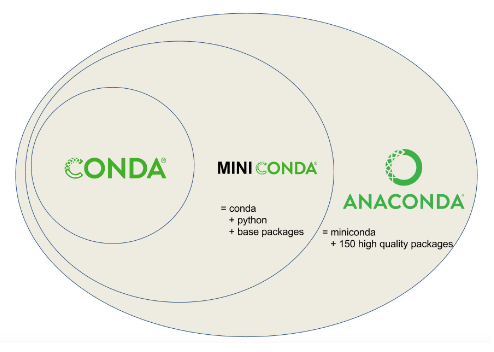

Tips:
- Keep your base env clean! (only the package manager + its deps)
- Generously create/remove environments for different tools/workflows!

In [31]:
!conda --version

conda 4.14.0


In [ ]:
!conda config --show channels

channels:
  - conda-forge
  - bioconda
  - defaults


In [32]:
!conda info


     active environment : None
       user config file : /root/.condarc
 populated config files : /root/.condarc
          conda version : 4.14.0
    conda-build version : not installed
         python version : 3.7.13.final.0
       virtual packages : __linux=5.10.147=0
                          __glibc=2.31=0
                          __unix=0=0
                          __archspec=1=x86_64
       base environment : /usr/local  (writable)
      conda av data dir : /usr/local/etc/conda
  conda av metadata url : None
           channel URLs : https://conda.anaconda.org/conda-forge/linux-64
                          https://conda.anaconda.org/conda-forge/noarch
                          https://conda.anaconda.org/bioconda/linux-64
                          https://conda.anaconda.org/bioconda/noarch
                          https://repo.anaconda.com/pkgs/main/linux-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.co

In [ ]:
# Finding Packages
# most recent versions

!conda search samtools | tail -n1

samtools                      1.16.1      h6899075_1  bioconda            


In [ ]:
!conda search snakemake | tail -n1

snakemake                     7.20.0      hdfd78af_0  bioconda            


In [ ]:
# list environment

!conda info --envs  # or conda env list

# conda environments:
#
base                  *  /usr/local



In [ ]:
# Create environment

!conda create --name=myenv python=3.8 numpy 'pysam>=0.16'

In [ ]:
# Remove environment

!conda env remove --name=myenv

In [ ]:
# Use environment
# conda activate <env>

!conda activate myenv

In [ ]:
# Use base environment

!conda deactivate

In [ ]:
# Install package
# conda install <package1> <package2>

!conda install snakemake

In [ ]:
# Uninstall package
# conda remove <pacage>

!conda remove snakemake

In [ ]:
# List packages

!conda list

# packages in environment at /usr/local:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
brotlipy                  0.7.0           py37h27cfd23_1003  
ca-certificates           2023.01.10           h06a4308_0  
certifi                   2022.12.7        py37h06a4308_0  
cffi                      1.15.0           py37hd667e15_1  
charset-normalizer        2.0.4              pyhd3eb1b0_0  
colorama                  0.4.4              pyhd3eb1b0_0  
conda                     4.12.0           py37h06a4308_0  
conda-content-trust       0.1.1              pyhd3eb1b0_0  
conda-package-handling    1.8.1            py37h7f8727e_0  
cryptography              36.0.0           py37h9ce1e76_0  
htslib                    1.3                           0    bioconda
idna                      3.3                pyhd3eb1b0_0  
ld_impl_linux-64          2.35.1      

## mamba

- Newer package manager called mamba
- A reimplementation of conda
- Compatible with conda
- Much faster than conda

Common pitfalls
- Wrong channel order
- Installing packages in your base env
- Manually manipulating $PYTHONPATH
- Avoid manually (i.e., not via conda/mamba) installed packages

In [38]:
!mamba --version

mamba 0.27.0
conda 22.9.0


In [ ]:
# create environment

!mamba create --name=snakemake snakemake
!conda activate snakemake
!snakemake --version

In [35]:
# export environment to YAML file

!conda env export --no-builds > env.yaml

In [36]:
!cat env.yaml

name: base
channels:
  - conda-forge
  - bioconda
  - defaults
dependencies:
  - _libgcc_mutex=0.1
  - _openmp_mutex=4.5
  - brotlipy=0.7.0
  - ca-certificates=2022.12.7
  - certifi=2022.12.7
  - cffi=1.15.0
  - charset-normalizer=2.0.4
  - colorama=0.4.4
  - conda=4.14.0
  - conda-content-trust=0.1.1
  - conda-package-handling=1.8.1
  - cryptography=36.0.0
  - htslib=1.3
  - idna=3.3
  - ld_impl_linux-64=2.35.1
  - libffi=3.3
  - libgcc-ng=9.3.0
  - libgomp=9.3.0
  - libstdcxx-ng=9.3.0
  - ncurses=6.3
  - openssl=1.1.1s
  - pip=21.2.2
  - pycosat=0.6.3
  - pycparser=2.21
  - pyopenssl=22.0.0
  - pysocks=1.7.1
  - python=3.7.13
  - python_abi=3.7
  - readline=8.1.2
  - requests=2.27.1
  - ruamel_yaml=0.15.100
  - setuptools=61.2.0
  - six=1.16.0
  - sqlite=3.38.2
  - tk=8.6.11
  - toolz=0.12.0
  - tqdm=4.63.0
  - urllib3=1.26.8
  - wheel=0.37.1
  - xz=5.2.5
  - yaml=0.2.5
  - zlib=1.2.12
prefix: /usr/local


In [ ]:
# create environment with YAML file

!conda env create --name=more-map-and-call --file=env.yaml

Conda package recipes
```
$ tree -A recipes/varlociraptor
recipes/varlociraptor/
├── build.sh
└── meta.yaml
```
- meta.yaml is required
- optional:
  - build.sh
  - (small) test files
  - license file

In [40]:
!mkdir recipes
!conda-skeleton base

mkdir: cannot create directory ‘recipes’: File exists
/bin/bash: conda-skeleton: command not found
